<a href="https://colab.research.google.com/github/Poseidon284/CODSOFT-Task-2/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction

This notebook aims to create a Machine Learning model to predict customer churn for a subscription-based service or business. Use historical customer data, including features like usage behavior and customer demographics, and try
algorithms like Logistic Regression, Random Forests, or Gradient
Boosting to predict churn.

## Mounting and choosing directory

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
#Replace path of the dataset in your drive
%cd '/content/gdrive/MyDrive/CustomerChurn'

/content/gdrive/MyDrive/CustomerChurn


## Importing necessary libraries

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance

## Importing Dataset and checking for missing values

In [126]:
cust_df = pd.read_csv('Churn_Modelling.csv')
cust_df.isna()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [127]:
cust_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Random Forest Classifier

### Transforming Geography and Gender columns

Surname column is not required so we drop it first. Then we do one-hot encoding using pandas 'get_dummies' to convert categorical data to numerical data

### Dropping useless columns

In [128]:
#Execute drop only once
cust_df = cust_df.drop('Surname',axis=1)
cust_df = cust_df.drop(['CustomerId','RowNumber'],axis=1)

### One-hot Encoding

In [129]:
cust_df = pd.get_dummies(cust_df)
cust_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


## Identifying Features and Targets

Here our target variable is the 'Exited' column.
Other columns that are not indices like 'CustomerId' and 'RowNumber' are considered as features for the classifier.

In [130]:
labels = np.array(cust_df['Exited'])

#Drop the prediction values from dataframe
cust_df = cust_df.drop('Exited',axis=1)

feature_list = list(cust_df.columns)
cust_df = np.array(cust_df)
cust_df

array([[619.,  42.,   2., ...,   0.,   1.,   0.],
       [608.,  41.,   1., ...,   1.,   1.,   0.],
       [502.,  42.,   8., ...,   0.,   1.,   0.],
       ...,
       [709.,  36.,   7., ...,   0.,   1.,   0.],
       [772.,  42.,   3., ...,   0.,   0.,   1.],
       [792.,  28.,   4., ...,   0.,   1.,   0.]])

## Creating Training and Testing Sets

In [132]:
train_features, test_features, train_labels, test_labels = train_test_split(cust_df, labels, test_size = 0.2, random_state = 42)

Check the shape to verify correct splitting

In [133]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (8000, 13)
Training Labels Shape: (8000,)
Testing Features Shape: (2000, 13)
Testing Labels Shape: (2000,)


## Random Forest Classifier

We will implement the random forest classifier below

In [134]:
rfc = RandomForestClassifier(random_state=40)
rfc.fit(train_features,train_labels)
rfc_pred = rfc.predict(test_features)

In [135]:
rfc_pred

array([0, 0, 0, ..., 1, 0, 0])

## Model Evaluation

Confusion Matrix and Classifier Reports are shown below

In [136]:
#Confusion Matrix
print("Confusion Matrix")
print(confusion_matrix(test_labels,rfc_pred))

#Classification Report
print("\nClassification Report")
print(classification_report(test_labels,rfc_pred))

Confusion Matrix
[[1548   59]
 [ 212  181]]

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



### Confusion Matrix Plotting for RFC

<Axes: title={'center': 'Exited(0 - Churn, 1 - No Churn)'}>

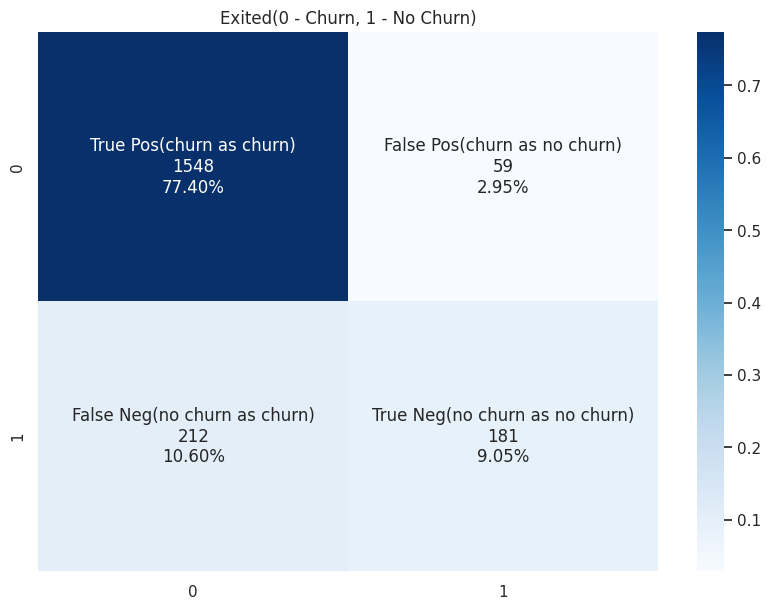

In [210]:
conf_mat = confusion_matrix(test_labels,rfc_pred)
group_names = ['True Pos(churn as churn)','False Pos(churn as no churn)','False Neg(no churn as churn)','True Neg(no churn as no churn)']
group_counts = ["{0:0.0f}".format(value) for value in conf_mat.flatten()]
group_percent = ["{0:.2%}".format(value) for value in conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_names,group_counts,group_percent)]
labels = np.asarray(labels).reshape(2,2)
sns.set(rc={'figure.figsize':(10,7)})
ax = plt.axes()
ax.set_title('Exited(0 - Churn, 1 - No Churn)')
sns.heatmap(conf_mat/np.sum(conf_mat),annot=labels,fmt='',ax =ax, cmap='Blues')

ROC-AUC Score

In [137]:
rfc_cv_score = cross_val_score(rfc, cust_df, labels, cv=10,scoring='roc_auc')

print("All AUC scores")
print(rfc_cv_score)

print("\nMean AUC Score")
print(rfc_cv_score.mean())

All AUC scores
[0.85990923 0.83995036 0.86677875 0.8366865  0.8631731  0.84916002
 0.85017305 0.86558276 0.85656804 0.83456435]

Mean AUC Score
0.8522546138048666


## Hyperparameter Tuning for RFC

Preparation of Random Grid for RandomizedSearchCV

In [144]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['sqrt']

max_depth = [int(x) for x in np.linspace(start = 100,stop=500,num=11)]
max_depth.append(None)

random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth
}

RandomizedSearchCV from sklearn is used to optimize hyperparameters

In [ ]:
rfc_random = RandomizedSearchCV(estimator=rfc,param_distributions=random_grid,
                                n_iter=100,cv=3,verbose=2,random_state=42,n_jobs=-1)

rfc_random.fit(train_features, train_labels)
print(rfc_random.best_params_)

### Best Hyperparameters for the RandomForest Model

Fitting 3 folds for each of 100 candidates, totalling 300 fits

{'n_estimators': 2000, 'max_features': 'auto', 'max_depth': 300}

In [139]:
rfc_best = RandomForestClassifier(n_estimators=2000,max_features='sqrt',max_depth=300)

rfc_best.fit(train_features,train_labels)
rfc_hypo = rfc_best.predict(test_features)

Confusion Matrix and Classifier Reports are given below

In [188]:
#Confusion Matrix
print("Confusion Matrix")
print(confusion_matrix(test_labels,rfc_hypo))

#Classification Report
print("\nClassification Report")
print(classification_report(test_labels,rfc_hypo))

Confusion Matrix
[[1546   61]
 [ 212  181]]
[0 0 0 ... 1 1 1]

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



### Confusion Matrix plotting for Hypo Tuned RFC

<Axes: title={'center': 'Exited(0 - Churn, 1 - No Churn)'}>

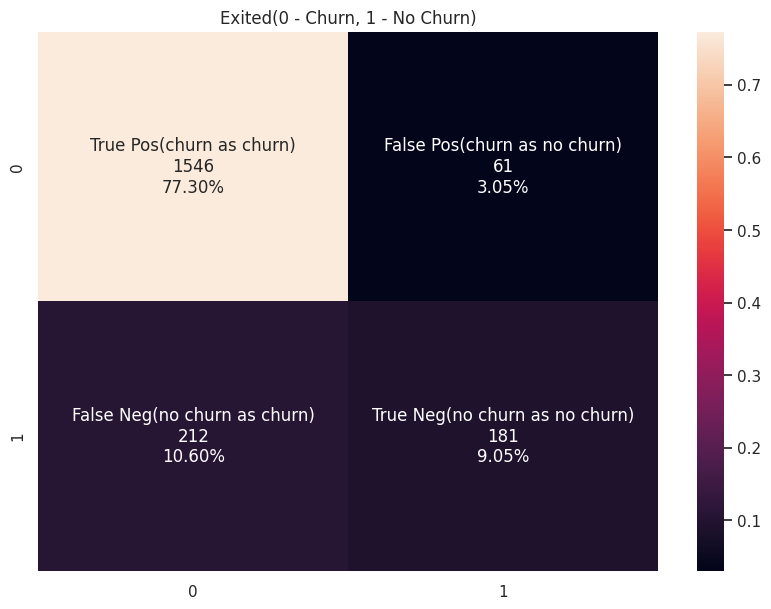

In [204]:
conf_mat = confusion_matrix(test_labels,rfc_hypo)
group_names = ['True Pos(churn as churn)','False Pos(churn as no churn)','False Neg(no churn as churn)','True Neg(no churn as no churn)']
group_counts = ["{0:0.0f}".format(value) for value in conf_mat.flatten()]
group_percent = ["{0:.2%}".format(value) for value in conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_names,group_counts,group_percent)]
labels = np.asarray(labels).reshape(2,2)
sns.set(rc={'figure.figsize':(10,7)})
ax = plt.axes()
ax.set_title('Exited(0 - Churn, 1 - No Churn)')
sns.heatmap(conf_mat/np.sum(conf_mat),annot=labels,fmt='',ax =ax)

ROC-AUC Score

In [141]:
rfc_hypocv_score = cross_val_score(rfc_best, cust_df, labels, cv=10,scoring='roc_auc')

print("All AUC scores")
print(rfc_hypocv_score)

print("\nMean AUC Score")
print(rfc_hypocv_score.mean())

All AUC scores
[0.86191989 0.83987339 0.87673662 0.83921753 0.8673022  0.84223507
 0.85476094 0.86960647 0.85846555 0.84323603]

Mean AUC Score
0.8553353690456081


## Difference in the Hyperparameter tuned and Regular Model

In [143]:
print("Difference in Mean AUC score : ",rfc_hypocv_score.mean()-rfc_cv_score.mean())

Difference in Mean AUC score :  0.003080755240741584


Hence Hyperparameter Tuning improved the model's prediction capability by 0.3%

## Visualization of Random Forest Classifier Decision Tree

The max depth of the first Decision Tree is 16. So the tree is not clear

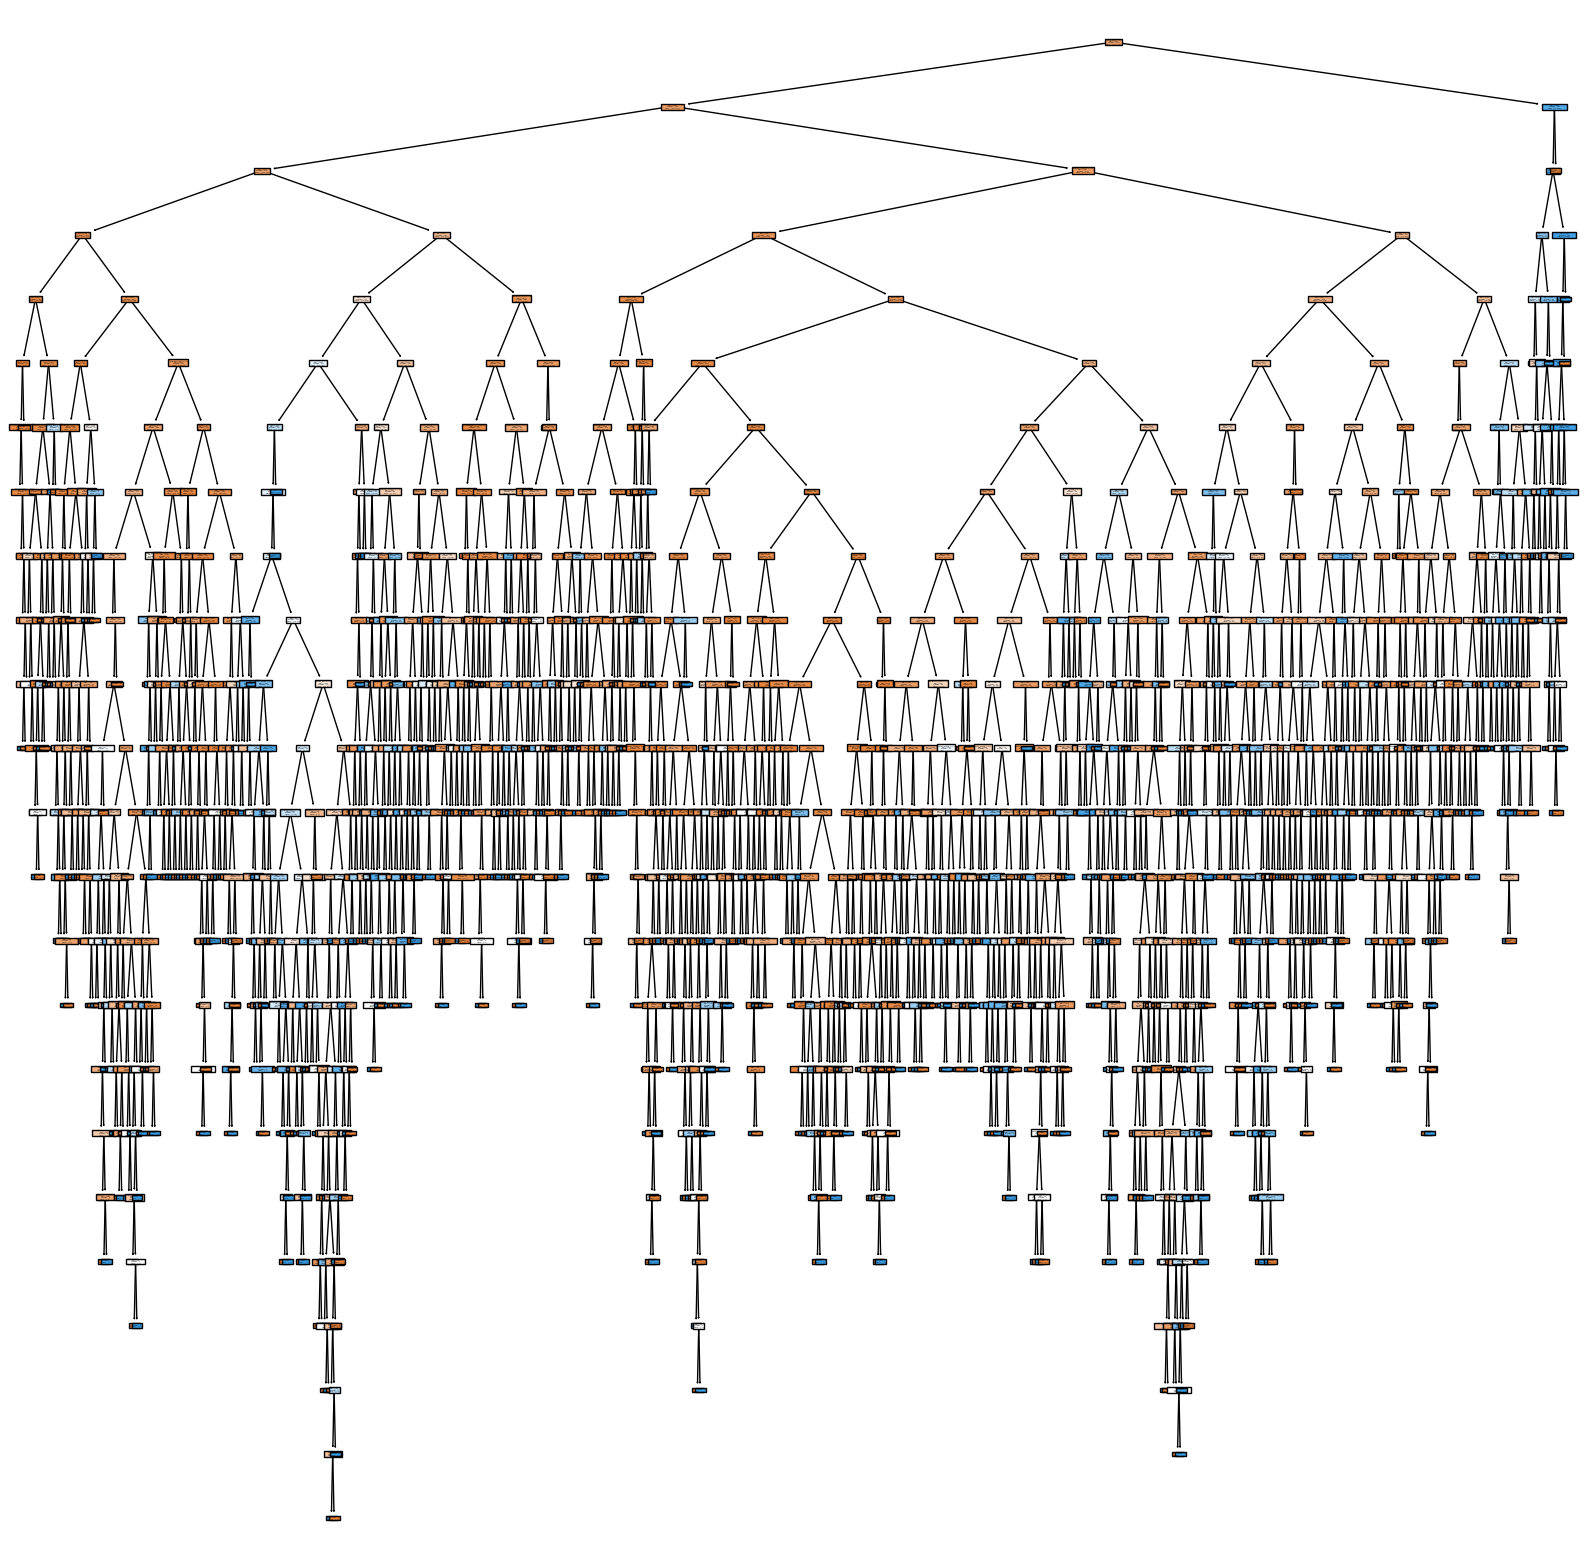

In [164]:
len(rfc.estimators_)
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rfc.estimators_[0], feature_names=feature_list, filled=True)

## Feature Importance Plot - Based on Feature Permutation

The features that contribute the most to accuracy are given below in the box plot

In [171]:
result = permutation_importance(
    rfc, test_features, test_labels, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=feature_list)
forest_importances = forest_importances.sort_values(ascending=False)

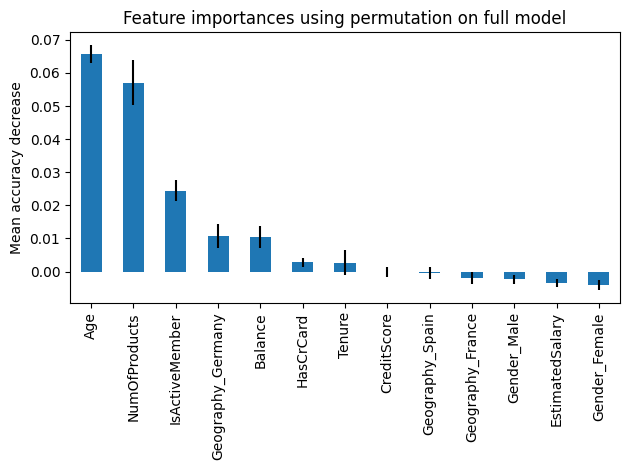

In [172]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

From the above plot, we can see that "Age" , "NumOfProducts" and "IsActiveMember" are the main features that impact customer churn

While features like "Geography" and "Balance" have a little bit of impact on the prediction of customer churn

Features like "HasCard", "Tenure", "CreditScore" and other features have very little impact on the Customer Churn Rate

## Author

Radhesh Rathnam J

February 7, 2024